In [11]:
#importing packages
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

#importing data into dataframe
path = '/Users/Documents/Eco 590 /Weekly Tasks/assignment-2-get-data-kate-fong/' #dont forget to add a / !!!!!!
rt = pd.read_csv(path+'finalrottentomato.csv')

### 1. Create 2 graphs between two variables. Be sure to include the title, labels of both axis. Include a legend if necessary. Be sure that nothing overlaps in the graph (words or legends, etc).

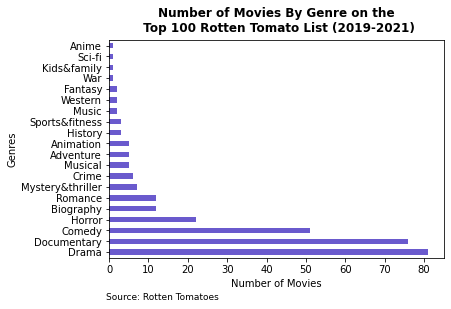

In [12]:
#counting how many movies of each genre there are and plotting this in a horizontal bar chart
rt['Genre'].value_counts().plot(kind='barh', color='slateblue') #https://mode.com/python-tutorial/counting-and-plotting-in-python/
plt.xlabel('Number of Movies') #labeling x axis
plt.ylabel('Genres') #labeling y axis
plt.title("Number of Movies By Genre on the\n Top 100 Rotten Tomato List (2019-2021)", fontweight='bold', y=1.01) #making the title two lines, bolded ; y= is the location https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
plt.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-80,-20), fontsize=9,
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib
plt.show()

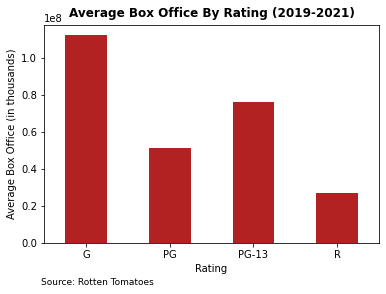

In [13]:
#grouping the data by rating and finding the average box office value for each rating; plotting this information into a bar chart
rt[['Rating','BoxOffice(GrossUSA)']].drop_duplicates().groupby(['Rating']).mean().plot(kind='bar', color='firebrick', legend=False)
plt.xlabel('Rating') #labeling x axis
plt.ylabel('Average Box Office (in thousands)') #labeling y axis
plt.title("Average Box Office By Rating (2019-2021)", fontweight='bold', y=1.01) #making the title two lines https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
plt.xticks(rotation=0) # rotating the x axis tick labels https://www.kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib
plt.show()


### 3. Display the graphs side by side in one figure. 

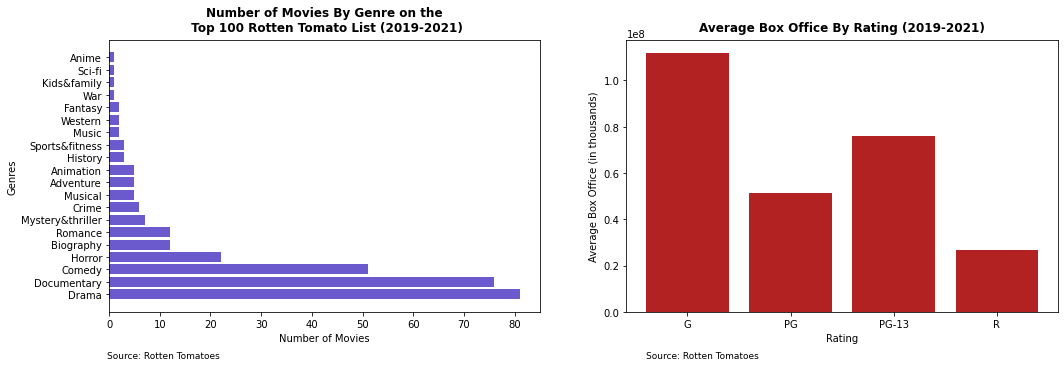

In [14]:
#creating a plot with 1 row and 2 columms
fig, ax = plt.subplots(figsize=(17,5), nrows = 1, ncols = 2)

#counting how many movies there are of each genre and making a data frame called 'unique_genres' and 'count'
genrecount = pd.DataFrame(rt['Genre'].value_counts().rename_axis('unique_genres').reset_index(name='count')) #https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe
ax1 = plt.subplot(1, 2,1) #specifying we are working in the 1st plot
ax1.barh(genrecount['unique_genres'],genrecount['count'], color='slateblue') #creating a horizontal bar chat with the two columns of data that we made
ax1.set_xlabel('Number of Movies') #labeling the x axis
ax1.set_ylabel('Genres') #labeling the y axis
ax1.set_title("Number of Movies By Genre on the\n Top 100 Rotten Tomato List (2019-2021)", fontweight='bold', y=1.01) #making the title two lines https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
ax1.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-101,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding annotation (source)

ax2 = plt.subplot(1, 2, 2)#specifying we are working in the 2nd plot
avgbobyrating= (rt[['Rating','BoxOffice(GrossUSA)']].drop_duplicates().groupby(['Rating']).mean()) #grouping the data by rating and finding the average box office for each rating and assigning it to a variable
avgbobyratingdf = pd.DataFrame(avgbobyrating['BoxOffice(GrossUSA)'].rename_axis('unique_rating').reset_index(name='avgbo')) #making it a dataframee and specifying the column names
ax2.bar(avgbobyratingdf['unique_rating'],avgbobyratingdf['avgbo'], color='firebrick') #plotting a bar graph 
ax2.set_xlabel('Rating') #labeling x axis
ax2.set_ylabel('Average Box Office (in thousands)') #labeling y axis
ax2.set_title("Average Box Office By Rating (2019-2021)", fontweight='bold', y=1.01) #making the title two lines https://stackoverflow.com/questions/21967639/how-to-write-a-plot-title-in-more-than-one-line-using-suptitle-in-python/21967777
ax2.annotate('Source: Rotten Tomatoes', (0.23,-.07), (-80,-20), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib

plt.show()


### 4. Do a third graph that is not a line graph or bar chart (with proper labels and titles). Make sure this third graph displays different information than presented in step 1.


<ipython-input-15-5f8d02909126>:14: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(distributercount['% total'] , labels=distributercount['rating'] , autopct='%1.0f%%',  shadow=True, startangle=90, labeldistance=None, pctdistance=1.12,


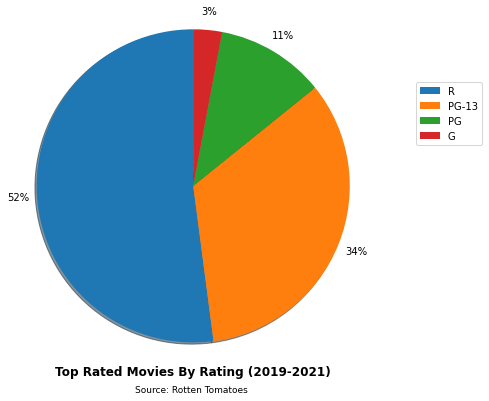

In [15]:
#calculating the percantage of specifcally rated movies that showed up in the top rated list (2019-2021)
distributercount = pd.DataFrame(rt['Rating'].value_counts().rename_axis('rating').reset_index(name='count')) #counting the amount of each rating there was in the df and made this into a new data frame
tot = distributercount['count'].sum() #adding up the count column
distributercount['% total'] = distributercount['count']/tot #finding the % 
distributercount

# Make figure and axes
fig, ax1 = plt.subplots() 

# explode = (0, 0, 0, 0.1, 0,0.1,0,0) #taking a piece of the pie out and highlighting it
#                 #    ^tells which piece of the pie is being highlights

# A standard pie plot; pie is the function                                   v this is how many decimal places 
ax1.pie(distributercount['% total'] , labels=distributercount['rating'] , autopct='%1.0f%%',  shadow=True, startangle=90, labeldistance=None, pctdistance=1.12, 
        radius = 1.8)

ax1.legend(bbox_to_anchor=(1.5, 1), loc='upper left') #adding the legend
ax1.set_title('Top Rated Movies By Rating (2019-2021)', y=-.4,fontweight='bold' ) #adding the title
ax1.annotate('Source: Rotten Tomatoes', (0.23,-.07), (0,-75), fontsize=9, 
             xycoords='axes fraction', textcoords='offset points', va='top') #adding the source https://stackoverflow.com/questions/41046214/cite-a-data-source-in-matplotlib



plt.show()



This shows us that a little over half of the movies (54%) that have shown up on the Top 100 Movies List by Rotten Tomatoes from 2019-2021 have been rated R.

In [495]:
#rt['genre'].value_counts() #https://www.marsja.se/pandas-count-occurrences-in-column-unique-values/

In [496]:
#rt.dtypes 
#rt['distributer'].unique() #https://cmdlinetips.com/2018/01/how-to-get-unique-values-from-a-column-in-pandas-data-frame/

In [ ]:
#rt[['rating','boxoffice']].drop_duplicates().groupby(['rating']).mean()